# P53例4.1  极大似然估计(MLE)

In [3]:
"""
  Bayes (Maximum Likelihood Estimate)
"""
# coding:utf-8

import numpy as np

class Bayes:
    def create_vocab_list(self, dataSet): #创建词汇表 create vocab list, like[1, 2, 3, 'S', 'M', 'L']
        vocab_set = set()
        for document in dataSet:
            vocab_set = vocab_set | set(document)
        return list(vocab_set)

    def set_of_word2vec(self, vocab_list, input_set):   #词条向量 return feature vector, like a feature vector is [1, 'S']，if vocab_list is [1, 2, 3, 'S', 'M', 'L']，return vocab vector [1, 0, 0, 1, 0, 0]
        vocab_vec = [0] * len(vocab_list)    #vocablist大小的零向量 zero vector
        for word in input_set:   #遍历输入样本的每个特征   iterating every feature
            if word in vocab_list:
                vocab_vec[vocab_list.index(word)] = 1    #如果发现有匹配的值就设置为1
        return vocab_vec

    def train(self, dataSet, labels):   #训练样本 train
        self._vocab_list = self.create_vocab_list(dataSet)  #创建特征词汇表 create vocab list
        train_matrix = []    #多条词条向量的矩阵（一个词条向量代表着一个样本在词条中出现的次数） matrix consists of vocab vector
        for line in dataSet:    #将每个训练样本转换为词条向量 feature vector to vocab vector
            train_matrix.append(self.set_of_word2vec(self.vocab_list, line))
        n = len(self.vocab_list) #词条的特征数   feature num
        negative_feature_num = np.zeros(n)    #在类别为-1时，出现特征的次数向量（n1 means negative 1）,the vector of counting num of every feature when label equal -1
        positve_feature_num = np.zeros(n)    #在类别为1时，出现特征的次数向量（）
        negative_num = 0    #标签中出现-1的次数 counting the number of negative label
        positive_num = 0
        for i in range(len(train_matrix)):
            if labels[i] == 1:
                positive_num += 1
                positve_feature_num += train_matrix[i]
            else:
                negative_feature_num += train_matrix[i] #与词条向量相加
                negative_num += 1
        self._positive_vec = positve_feature_num / positive_num   #类别为1的各个随机向量（特征）的概率分布    the probability of feture num
        self._negative_vec = negative_feature_num / negative_num
        self._p_positive = positive_num / float(len(labels)) #p(y=1)的概率 the probability of positive label
        # return self._positive_vec, self._negative_vec, self._p_positive

    def predict(self, input_data):   #预测函数
        input_vec = self.set_of_word2vec(self.vocab_list, input_data)#测试样本的词条向量
        # np.multiply(self.p1Vect ,inputVec)
        p_positive = self.p_positive   #按照公式需要乘以p(y=1)的值，我们就以此为初始值
        p_negative = (1 - self.p_positive)
        for num in np.multiply(self.positive_vec ,input_vec):  #概率分布和词条向量进行相乘，得出p(x=xi|y=1)的概率，然后相乘
            if (num > 0):
                p_positive *= num
        for num in np.multiply(self.negative_vec ,input_vec):
            if (num > 0):
                p_negative *= num
        print(p_positive, p_negative)
        if (p_positive > p_negative):  #相比，谁大就倾向谁 up to max probability
            return 1
        else:
            return -1

    @property
    def vocab_list(self):
        return self._vocab_list

    @property
    def positive_vec(self):
        return self._positive_vec

    @property
    def negative_vec(self):
        return self._negative_vec

    @property
    def p_positive(self):
        return self._p_positive

if __name__ == "__main__":
    dataSet = [[1, "S"], [1, "M"], [1, "M"], [1, "S"], [1, "S"],
               [2, "S"], [2, "M"], [2, "M"], [2, "L"], [2, "L"],
               [3, "L"], [3, "M"], [3, "M"], [3, "L"], [3, "L"]]
    labels = [-1, -1, 1, 1, -1,
              -1, -1, 1, 1,  1, 
               1,  1, 1, 1, -1]
    bayes = Bayes()
    bayes.train(dataSet, labels)
    
    result=bayes.predict([2, "S"])
    print("prediction is:", result)


0.02222222222222222 0.06666666666666667
prediction is: -1


# P54例4.2 贝叶斯估计（BE）

In [5]:
"""
   Bayes(Bayes Estimate),

"""
# coding:utf-8
import numpy as np
class bayes:
    def __init__(self, lamb = 1):
        if (lamb < 0):  #因为lamb大于等于0
            self._lamb = 1
        else:
            self._lamb = lamb

    def create_vocab_list(self, dataSet): #创建词汇表
        vocab_set = set([])
        m, n = np.shape(dataSet)    #获得数据集的行和列
        self._S = [] #每个特征在自己的维度里出现的次数
        for i in range(n):  #按维度来创建词条，第一维，第二维这样
            column = set([row[i] for row in dataSet])
            vocab_set = vocab_set | set(column)
            self._S.extend(list(np.ones(len(column)) * len(column)))
        return list(vocab_set)

    def set_of_word2vec(self, vocab_list, input_set):   #词条向量 return feature vector, like a feature vector is [1, 'S']，if vocab_list is [1, 2, 3, 'S', 'M', 'L']，return vocab vector [1, 0, 0, 1, 0, 0]
        vocab_vec = [0] * len(vocab_list)    #vocablist大小的零向量 zero vector
        for word in input_set:   #遍历输入样本的每个特征   iterating every feature
            if word in vocab_list:
                vocab_vec[vocab_list.index(word)] = 1    #如果发现有匹配的值就设置为1
        return vocab_vec

    def train(self, dataSet, labels):   #训练样本
        self._vocab_list = self.create_vocab_list(dataSet)  # 创建特征词汇表 create vocab list
        train_matrix = []  # 多条词条向量的矩阵（一个词条向量代表着一个样本在词条中出现的次数） matrix consists of vocab vector
        for line in dataSet:  # 将每个训练样本转换为词条向量 feature vector to vocab vector
            train_matrix.append(self.set_of_word2vec(self.vocab_list, line))
        n = len(self.vocab_list)  # 词条的特征数   feature num
        print(n)
        negative_feature_num = np.zeros(n)  # 在类别为-1时，出现特征的次数向量（n1 means negative 1）,the vector of counting num of every feature when label equal -1
        positve_feature_num = np.zeros(n)  # 在类别为1时，出现特征的次数向量（）
        negative_num = 0  # 标签中出现-1的次数 counting the number of negative label
        positive_num = 0
        for i in range(len(train_matrix)):
            if labels[i] == 1:
                positive_num += 1
                positve_feature_num += train_matrix[i]
            else:
                negative_feature_num += train_matrix[i]  # 与词条向量相加
                negative_num += 1
        self._positive_vec =  (positve_feature_num + self.lamb) / (positive_num + np.array(self.S) * self.lamb)  #p1的各个随机向量（特征）的概率分布
        self._negative_vec = (negative_feature_num + self.lamb) / (negative_num + np.array(self.S)  * self.lamb)
        self._p_positive = (positive_num + self.lamb) / float(len(labels) + len(set(labels)) * self.lamb) #p(y=1)的概率
        # return self.p1Vect, self.pN1Vect, self.pClass1

    def predict(self, input_data):   #预测函数
        input_vec = self.set_of_word2vec(self.vocab_list, input_data)  # 测试样本的词条向量
        # np.multiply(self.p1Vect ,inputVec)
        p_positive = self.p_positive  # 按照公式需要乘以p(y=1)的值，我们就以此为初始值
        p_negative = (1 - self.p_positive)
        for num in np.multiply(self.positive_vec, input_vec):  # 概率分布和词条向量进行相乘，得出p(x=xi|y=1)的概率，然后相乘
            if (num > 0):
                p_positive *= num
        for num in np.multiply(self.negative_vec, input_vec):
            if (num > 0):
                p_negative *= num
        print(p_positive, p_negative)
        if (p_positive > p_negative):  # 相比，谁大就倾向谁 up to max probability
            return 1
        else:
            return -1

    @property
    def lamb(self):
        return self._lamb

    @property
    def vocab_list(self):
        return self._vocab_list

    @property
    def positive_vec(self):
        return self._positive_vec

    @property
    def negative_vec(self):
        return self._negative_vec

    @property
    def p_positive(self):
        return self._p_positive

    @property
    def S(self):
        return self._S

if __name__ == "__main__":
    dataSet = [[1, "S"], [1, "M"], [1, "M"], [1, "S"], [1, "S"],
               [2, "S"], [2, "M"], [2, "M"], [2, "L"], [2, "L"],
               [3, "L"], [3, "M"], [3, "M"], [3, "L"], [3, "L"]]
    labels = [-1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1]
    bayes = bayes()
    bayes.train(dataSet, labels)
    
    result = bayes.predict([2, "S"])
    print("prediction is:",result )


6
0.0326797385620915 0.06100217864923746
prediction is: -1


## 第4章朴素贝叶斯法-习题

### 习题4.1
&emsp;&emsp;用极大似然估计法推出朴素贝叶斯法中的概率估计公式(4.8)及公式 (4.9)。

**解答：**  
**第1步：**证明公式(4.8)：$\displaystyle P(Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k)}{N}$  
由于朴素贝叶斯法假设$Y$是定义在输出空间$\mathcal{Y}$上的随机变量，因此可以定义$P(Y=c_k)$概率为$p$。  
令$\displaystyle m=\sum_{i=1}^NI(y_i=c_k)$，得出似然函数：$$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{N}{m}p^m(1-p)^{(N-m)}$$使用微分求极值，两边同时对$p$求微分：$$\begin{aligned}
0 &= \binom{N}{m}\left[mp^{(m-1)}(1-p)^{(N-m)}-(N-m)p^m(1-p)^{(N-m-1)}\right] \\
& = \binom{N}{m}\left[p^{(m-1)}(1-p)^{(N-m-1)}(m-Np)\right]
\end{aligned}$$可求解得到$\displaystyle p=0,p=1,p=\frac{m}{N}$  
显然$\displaystyle P(Y=c_k)=p=\frac{m}{N}=\frac{\displaystyle \sum_{i=1}^N I(y_i=c_k)}{N}$，公式(4.8)得证。

----

**第2步：**证明公式(4.9)：$\displaystyle P(X^{(j)}=a_{jl}|Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)}{\displaystyle \sum_{i=1}^N I(y_i=c_k)}$  
令$P(X^{(j)}=a_{jl}|Y=c_k)=p$，令$\displaystyle m=\sum_{i=1}^N I(y_i=c_k), q=\sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)$，得出似然函数：$$L(p)=\binom{m}{q}p^q(i-p)^{m-q}$$使用微分求极值，两边同时对$p$求微分：$$\begin{aligned}
0 &= \binom{m}{q}\left[qp^{(q-1)}(1-p)^{(m-q)}-(m-q)p^q(1-p)^{(m-q-1)}\right] \\
& = \binom{m}{q}\left[p^{(q-1)}(1-p)^{(m-q-1)}(q-mp)\right]
\end{aligned}$$可求解得到$\displaystyle p=0,p=1,p=\frac{q}{m}$  
显然$\displaystyle P(X^{(j)}=a_{jl}|Y=c_k)=p=\frac{q}{m}=\frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k)}{\displaystyle \sum_{i=1}^N I(y_i=c_k)}$，公式(4.9)得证。

### 习题4.2

&emsp;&emsp;用贝叶斯估计法推出朴素贝叶斯法中的慨率估计公式(4.10)及公式(4.11)

**解答：**  
**第1步：**证明公式(4.11)：$\displaystyle P(Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K \lambda}$  
加入先验概率，在没有任何信息的情况下，可以假设先验概率为均匀概率（即每个事件的概率是相同的）。  
可得$\displaystyle p=\frac{1}{K} \Leftrightarrow pK-1=0\quad(1)$  
根据习题4.1得出先验概率的极大似然估计是$\displaystyle pN - \sum_{i=1}^N I(y_i=c_k) = 0\quad(2)$  
存在参数$\lambda$使得$(1) \cdot \lambda + (2) = 0$  
所以有$$\lambda(pK-1) + pN - \sum_{i=1}^N I(y_i=c_k) = 0$$可得$\displaystyle P(Y=c_k) = \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K \lambda}$，公式(4.11)得证。  

----

**第2步：**证明公式(4.10)：$\displaystyle P_{\lambda}(X^{(j)}=a_{jl} | Y = c_k) = \frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k) + \lambda}{\displaystyle \sum_{i=1}^N I(y_i=c_k) + S_j \lambda}$   
根据第1步，可同理得到$$
P(Y=c_k, x^{(j)}=a_{j l})=\frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{N+K S_j \lambda}$$  
$$\begin{aligned} 
P(x^{(j)}=a_{jl} | Y=c_k)
&= \frac{P(Y=c_k, x^{(j)}=a_{j l})}{P(y_i=c_k)} \\
&= \frac{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{N+K S_j \lambda}}{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K \lambda}} \\
&= (\lambda可以任意取值，于是取\lambda = S_j \lambda) \\
&= \frac{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{N+K S_j \lambda}}{\displaystyle \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda}{N+K S_j \lambda}} \\ 
&= \frac{\displaystyle \sum_{i=1}^N I(y_i=c_k, x_i^{(j)}=a_{jl})+\lambda}{\displaystyle \sum_{i=1}^N I(y_i=c_k) + \lambda} (其中\lambda = S_j \lambda)\\
&= \frac{\displaystyle \sum_{i=1}^N I(x_i^{(j)}=a_{jl},y_i=c_k) + \lambda}{\displaystyle \sum_{i=1}^N I(y_i=c_k) + S_j \lambda}
\end{aligned} $$  
公式(4.11)得证。

#  调包

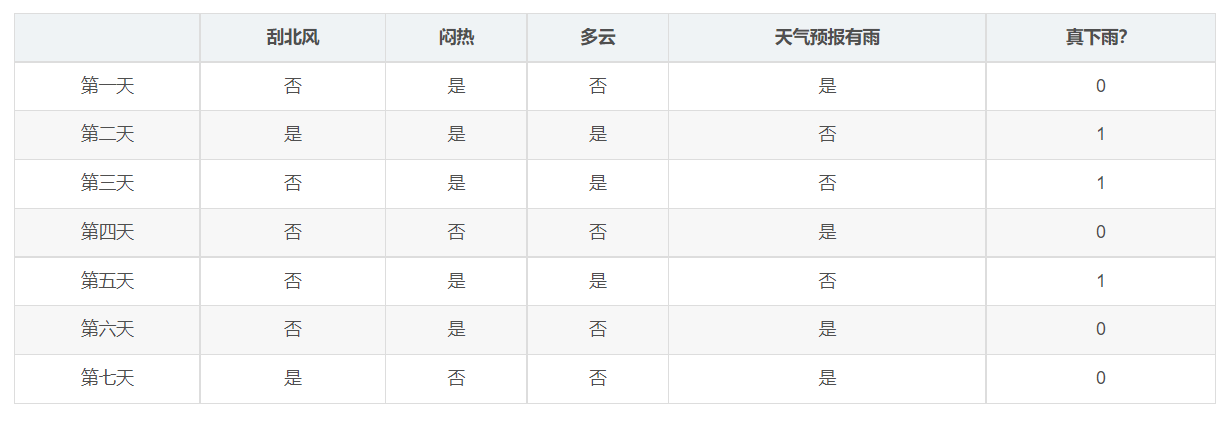
我们采用one-hot编码来解决这个问题，并对x为[0,0,1,0]的情况进行预测！

In [1]:
import numpy as np
x=np.array([[0,1,0,1],
           [1,1,1,0],
           [0,1,1,0],
           [0,0,0,1],
           [0,1,1,0],
           [0,1,0,1],
           [1,0,0,1]]
          )
y=np.array([0,
            1,
            1,
            0,
            1,
            0,
            0])
#导入朴素贝叶斯
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()
clf.fit(x,y)

#将下一天的情况输入模型
Next_Day=[[0,0,1,0]]
pre=clf.predict(Next_Day)
pre2=clf.predict_proba(Next_Day)

#输出模型预测结果
print("预测结果为：",pre)
#输出模型预测的分类概率
print("预测的概率为：",pre2)


预测结果为： [1]
预测的概率为： [[0.13848881 0.86151119]]


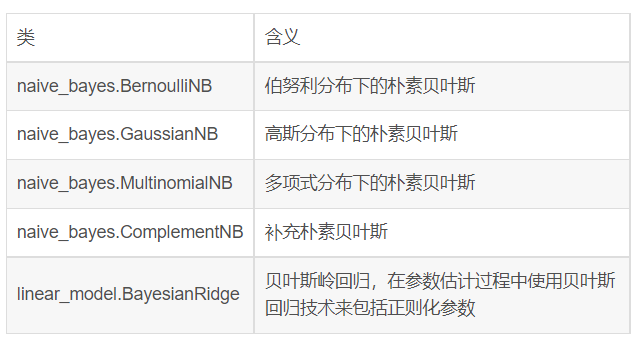

# 高斯朴素贝叶斯

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as CM
 
digits = load_digits()
 
X = digits.data
y = digits.target
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
#建模
gnb = GaussianNB().fit(Xtrain,Ytrain)
#查看分数
acc_score = gnb.score(Xtest,Ytest)
print(acc_score)
 
#查看预测的概率结果
Y_pred = gnb.predict(Xtest)
#查看预测的概率结果
prob = gnb.predict_proba(Xtest) #返回的是每个特征下的概率
 
#混淆矩阵
print(CM(Ytest, Y_pred))

0.8592592592592593
[[47  0  0  0  0  0  0  1  0  0]
 [ 0 46  2  0  0  0  0  3  6  2]
 [ 0  2 35  0  0  0  1  0 16  0]
 [ 0  0  1 40  0  1  0  3  4  0]
 [ 0  0  1  0 39  0  1  4  0  0]
 [ 0  0  0  2  0 58  1  1  1  0]
 [ 0  0  1  0  0  1 49  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  1  0  0  0  2 55  0]
 [ 1  1  0  1  2  0  0  3  7 41]]


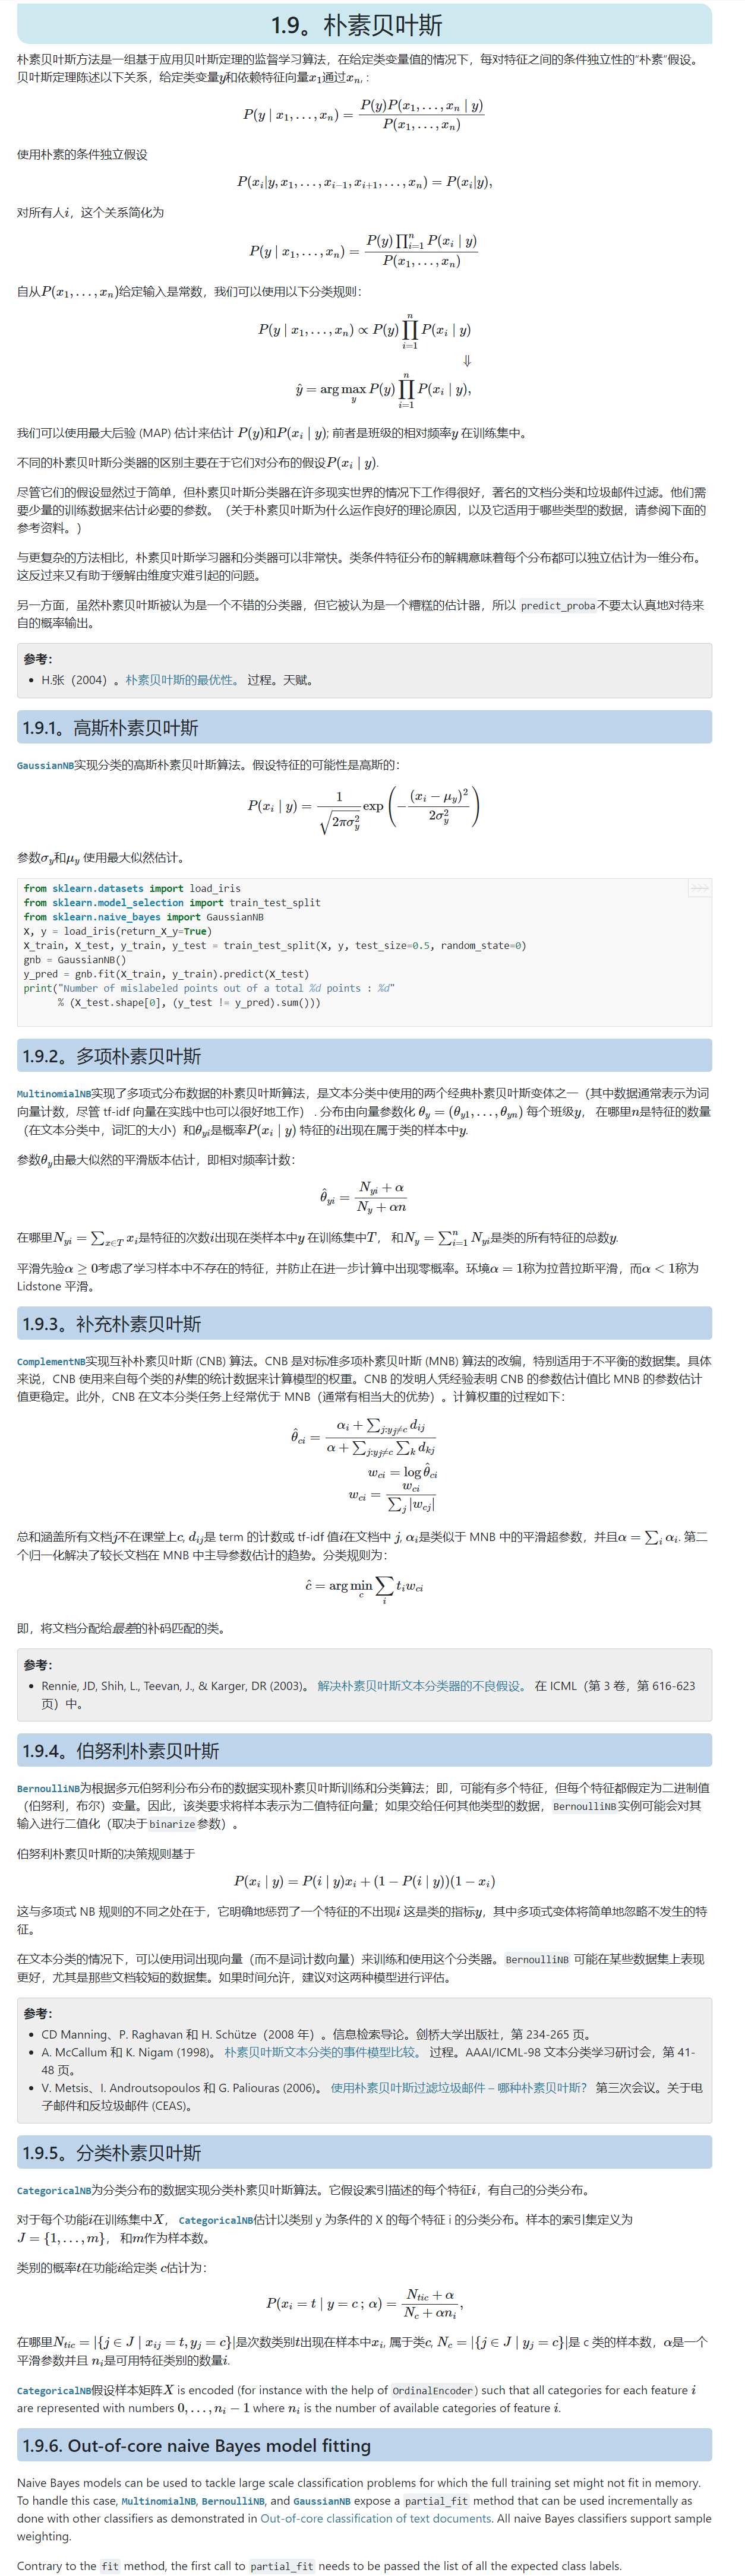